# Laboratorio 3 - CNYT

**Ana Gabriela Silva**

## Parte 1 - 08/09/2020



### 1. Estados con 2 qubits.
**Ejercicio 1.1.** Crear un circuito con 2 qubits. Inicializar el primer qubit en un estado proporccional al vector:

$$ \begin{bmatrix} 2-3i \\ 1+i \end{bmatrix}$$

Inicializar el segundo qubit en un estado proporcional al vector:

$$ \begin{bmatrix} -7+2i \\ 9+4i \end{bmatrix}$$


* ¿Qué resultados obtengo si sólo mido el primer qubit?
* ¿Qué resultados obtengo si sólo mido el segundo qubit?
* ¿Qué pasa cuándo mido ambos qubits y cómo se relaciona este resultado con los dos resultados obtenidos anteriormente?



In [1]:
#Importación
from qiskit import QuantumCircuit #Clase para crear circuitos
from qiskit import execute #Función para ejecutar simulaciones o trabajos en computadores cuánticos reales.
from qiskit import Aer #Módulo donde encontramos el acceso al simulador
from qiskit.visualization import plot_histogram #Visualizador del output como gráfico de barras
%matplotlib inline 
import numpy as np

In [2]:
#Normalización de vector 1
vector = np.array([[2-3j],[1+1j]])
#norma
norma_vector1 = np. linalg.norm(vector)
print(norma_vector1)
dividido = vector/norma_vector1
#vector normalizado
vector1_normalizado = (1/norma_vector1)*vector
print(vector1_normalizado)

3.872983346207417
[[0.51639778-0.77459667j]
 [0.25819889+0.25819889j]]


In [3]:
#Normalización de vector 2
vector2 = np.array([[-7+2j],[9+4j]])
#norma
norma_vector2 = np. linalg.norm(vector2)
print(norma_vector2)
dividido = vector/norma_vector2
#vector normalizado
vector2_normalizado = (1/norma_vector2)*vector2
print(vector2_normalizado)

12.24744871391589
[[-0.57154761+0.16329932j]
 [ 0.73484692+0.32659863j]]


In [4]:
q0 = [vector1_normalizado [0][0],vector1_normalizado [1][0]]
q1 = [vector2_normalizado [0][0],vector2_normalizado [1][0]]

In [5]:
#Declaro y lleno un circuito
circuito_1 = QuantumCircuit(2,1)
circuito_1.initialize(q0,0)
circuito_1.initialize(q1,1)
circuito_1.measure(0,0)
circuito_1.draw()

┌────────────────────────────────────────────┐ ┌─┐
q_0: ─┤ initialize(0.5164+-0.7746j,0.2582+0.2582j) ├─┤M├
     ┌┴────────────────────────────────────────────┴┐└╥┘
q_1: ┤ initialize(-0.57155+0.1633j,0.73485+0.3266j) ├─╫─
     └──────────────────────────────────────────────┘ ║ 
c_0: ═════════════════════════════════════════════════╩═

In [6]:
circuito_2 = QuantumCircuit(2,1)
circuito_2.initialize(q0,0)
circuito_2.initialize(q1,1)
circuito_2.measure(1,0)
circuito_2.draw()

┌────────────────────────────────────────────┐    
q_0: ─┤ initialize(0.5164+-0.7746j,0.2582+0.2582j) ├────
     ┌┴────────────────────────────────────────────┴┐┌─┐
q_1: ┤ initialize(-0.57155+0.1633j,0.73485+0.3266j) ├┤M├
     └──────────────────────────────────────────────┘└╥┘
c_0: ═════════════════════════════════════════════════╩═

In [7]:
circuito_3 = QuantumCircuit(2,2)
circuito_3.initialize(q0,0)
circuito_3.initialize(q1,1)
circuito_3.measure(0,0)
circuito_3.measure(1,1)

circuito_3.draw()

┌────────────────────────────────────────────┐ ┌─┐   
q_0: ─┤ initialize(0.5164+-0.7746j,0.2582+0.2582j) ├─┤M├───
     ┌┴────────────────────────────────────────────┴┐└╥┘┌─┐
q_1: ┤ initialize(-0.57155+0.1633j,0.73485+0.3266j) ├─╫─┤M├
     └──────────────────────────────────────────────┘ ║ └╥┘
c_0: ═════════════════════════════════════════════════╩══╬═
                                                         ║ 
c_1: ════════════════════════════════════════════════════╩═

{'1': 140, '0': 860}


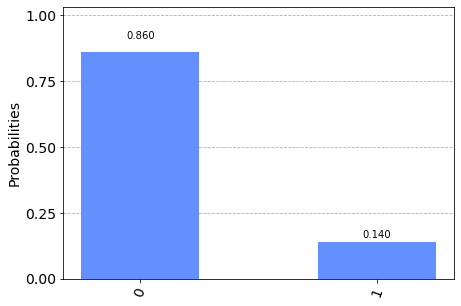

In [8]:
#Simulamos una ejecución 
simulador = Aer.get_backend('qasm_simulator')
ejecucion = execute(circuito_1, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos1 = resultado.get_counts()
print(conteos1)
plot_histogram(conteos1)

{'1': 622, '0': 378}


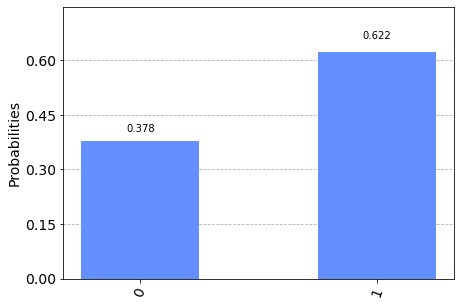

In [9]:
ejecucion = execute(circuito_2, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos2 = resultado.get_counts()
print(conteos2)
plot_histogram(conteos2)

{'01': 48, '10': 571, '11': 78, '00': 303}


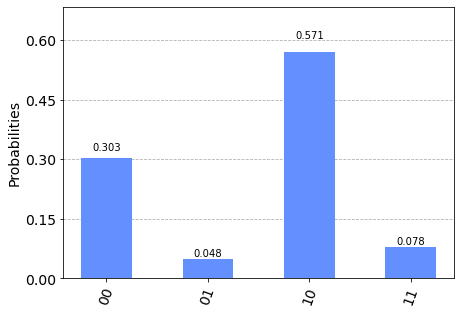

In [10]:
ejecucion = execute(circuito_3, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos3 = resultado.get_counts()
print(conteos3)
plot_histogram(conteos3)

**Ejercicio 1.2.** Si tu qubit superior está inicializado en el estado:


 $$ |\phi\rangle = \sqrt{0.15} |0\rangle + \sqrt{0.85} |1\rangle$$


 Encuentra un estado para inicializar tu qubit inferior de modo que el vector de estado final sea:


 $$ \begin{bmatrix} 0.245 \\ 0.3 \\ 0.583 \\ 0.714 \end{bmatrix}$$

In [11]:
circuito_4 = QuantumCircuit(1)
initial_state = [np.sqrt(0.15), np.sqrt(0.85)]
circuito_4.initialize(initial_state, 0) 


In [12]:
qubit_inicial = np.array([
    [np.sqrt(0.15), np.sqrt(0.85)]])
print(qubit_inicial)

[[0.38729833 0.92195445]]


In [13]:
primera_componente_a = (0.245/np.sqrt(0.15))
print(primera_componente_a)
primera_componente_b = (0.583/np.sqrt(0.85))
print(primera_componente_b)

x1 = 0.632

0.6325872798805448
0.6323522845413827


In [14]:
primera_componente_a = (0.3/np.sqrt(0.15))
print(primera_componente_a)
primera_componente_b = (0.714/np.sqrt(0.85))
print(primera_componente_b)

x2 = 0.774

0.7745966692414833
0.7744417344126024


In [15]:
estado_final = np.array([[x1,x2]])
print(estado_final)

[[0.632 0.774]]


In [16]:
producto_tensorial = np.kron(qubit_inicial,estado_final)
print(producto_tensorial)

[[0.24477255 0.29976891 0.58267521 0.71359274]]


**Conclusión:** para llegar al estado final necesario, se debía conocer como se realiza el producto tensorial para así devolvernos y encontrar el vector para inicializar el qubit anterior. 

Para llegar a las componentes del vector, se realizaba la división entre la primer posición del estado final sobre el valor inicializado en el estado $|0\rangle$ o $|1\rangle$


**Ejercicio 1.3.** Encuentra un circuito para obtener como estado final el estado entrelazado:


 $$ |\Psi^{+}\rangle = \frac{1}{\sqrt{2}} (|01\rangle + |10\rangle)$$

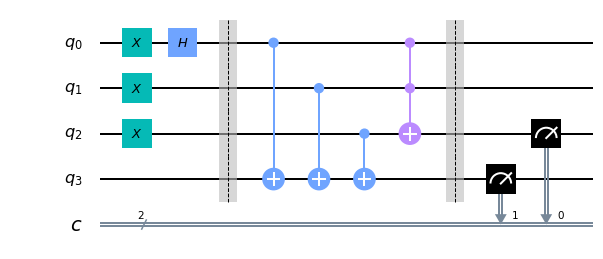

In [17]:
circuito_e = QuantumCircuit(4,2)
circuito_e.x(0)
circuito_e.h(0)
#circuito_e.h(1) -> con otra compuerta h, hace que la estado final no esté repartido solo entre dos estados. 
circuito_e.x(1)
circuito_e.x(2)
#circuito_e.x(3)
circuito_e.barrier()
circuito_e.cx(0,3)
circuito_e.cx(1,3)
circuito_e.cx(2,3)
circuito_e.ccx(0,1,2)
circuito_e.barrier()
circuito_e.measure(3,1)
circuito_e.measure(2,0)

circuito_e.draw(output='mpl')

{'01': 515, '10': 485}


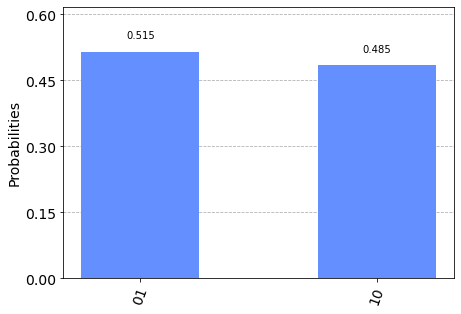

In [18]:
ejecucion = execute(circuito_e, backend = simulador,shots=1000)
resultado = ejecucion.result()
conteos4 = resultado.get_counts()
print(conteos4)
plot_histogram(conteos4)

**Conclusiones:** 
- Al momento de realizarlo concluí que al poner más de una compuerta h, hace que el estado final no esté repartido solo entre dos estados pedidos.
- Al poner solo una compuerta x, los estados finales que va a tomar va a ser 00 y 10, **no son los pedidos.**
- Al poner tres una compuerta x, los estados finales que va a tomar va a ser 00 y 10, **no son los pedidos.**
- En conclusión con las compuertas x, para llegar a los estados pedidos podemos tomas 2 o 3.

### 2. Hallar matriz y grafo

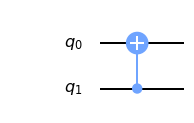

In [19]:
cnot_reves = QuantumCircuit(2)
cnot_reves.cx(1,0)
cnot_reves.draw(output='mpl')

- **Estados:**

![./CNYT/ESTADOS.PNG](./CNYT/ESTADOS.PNG)

- **Grafo:**

![./CNYT/GRAFO.PNG](./CNYT/GRAFO.PNG)

- **Matriz:**

![./CNYT/MATRIZ.PNG](./CNYT/MATRIZ.PNG)

## Parte 2 - 15/09/2020


### 3. SWAP

 **3.1 Hallar matriz y grafo de la compuerta SWAP**

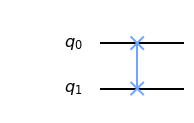

In [20]:
circuitoswap = QuantumCircuit(2)
circuitoswap.swap(0,1)

circuitoswap.draw(output='mpl')

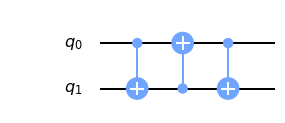

In [21]:
circuitoswap_1 = QuantumCircuit(2)
circuitoswap_1.cx(0,1)
circuitoswap_1.cx(1,0)
circuitoswap_1.cx(0,1)

circuitoswap_1.draw(output='mpl')

- Estados

![./CNYT/ESTADOS_SWAP.PNG](./CNYT/ESTADOS_SWAP.PNG)


- Grafo


![./CNYT/GRAFO_SWAP.PNG](./CNYT/GRAFO_SWAP.PNG)

- Matriz

![./CNYT/MATRIZ_SWAP.PNG](./CNYT/MATRIZ_SWAP.PNG)


**3.2 Cambiar el estado de los alambres**

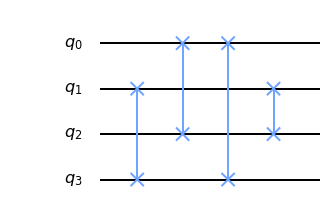

In [22]:
cqint = QuantumCircuit(4)
cqint.swap(1,3)
cqint.swap(0,2)
cqint.swap(0,3)
cqint.swap(1,2)

cqint.draw(output='mpl')

+ A --> A --> **C** --> **B** --> B
+ B --> **D** --> D --> A --> **D**
+ C --> C --> **A** --> D --> **A**
+ D --> **B** --> B --> **C** --> C

## Test de intercambio (para medir experimentalmente la fidelidad)

In [23]:
co_mas = QuantumCircuit(1,1)
co_menos = QuantumCircuit(1,1)
co_mas.h(0)
co_mas.measure(0,0)
co_menos.x(0)
co_menos.h(0)
co_menos.measure(0,0)

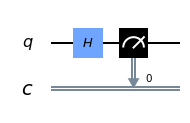

In [24]:
co_mas.draw(output='mpl')

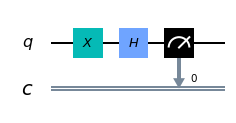

In [25]:
co_menos.draw(output='mpl')

In [26]:
simulador = Aer.get_backend('qasm_simulator')
conteos_mas = execute(co_mas, backend = simulador, shots=1000).result().get_counts()
conteos_menos = execute(co_menos, backend = simulador, shots=1000).result().get_counts()

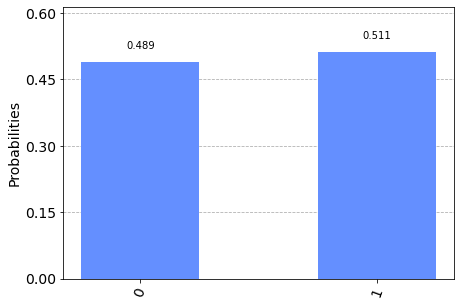

In [27]:
plot_histogram(conteos_mas)

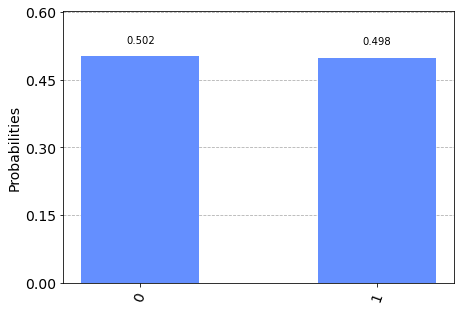

In [28]:
plot_histogram(conteos_menos)

In [29]:
def fidelidad(v1,v2):
    '''
    Esta función recibe 2 vectores complejos y retorna el cuadrado del módulo de su producto interno 
    '''
    
    return np.abs(np.vdot(v1,v2))**2

- Fidelidad : 0

In [30]:
v_mas = np.array([[1/np.sqrt(2)],[1/np.sqrt(2)]])
v_menos = np.array([[1/np.sqrt(2)],[-1/np.sqrt(2)]])

fidelidad(v_mas,v_menos)

0.0

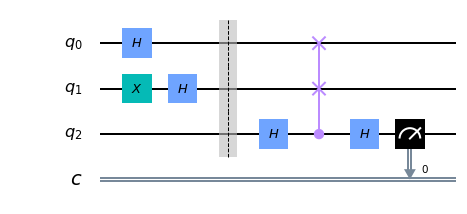

In [31]:
#Que pasa si yo hago el test de intercambio aplicado a mis estados |+> y |->?

cqtest= QuantumCircuit(3,1)
cqtest.h(0)
cqtest.x(1)
cqtest.h(1)
cqtest.barrier()
cqtest.h(2)
cqtest.cswap(2,1,0)
cqtest.h(2)
cqtest.measure(2,0)

cqtest.draw(output='mpl')

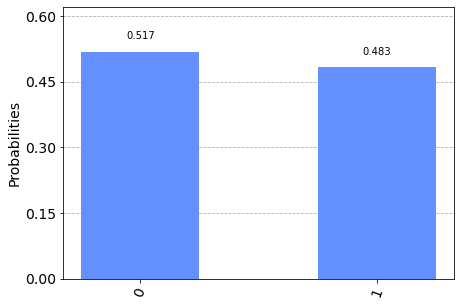

In [32]:
simulador = Aer.get_backend('qasm_simulator')
conteos_test = execute(cqtest, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos_test)

- Fidelidad = 0.1

In [33]:
estado_variable_5= ([[1-3.7j],[0+2j]])
norma_5 = np.linalg.norm(estado_variable_5)
ev_norm_5 = estado_variable_5/norma_5

print(ev_norm_5)

[[0.2313105-0.85584885j]
 [0.       +0.462621j  ]]


In [34]:
fidelidad(v_mas,ev_norm_5)

0.10406634563937936

In [35]:
estado5_q0 = [v_mas[0][0],v_mas[1][0]]
estado5_q1 = [ev_norm_5[0][0],ev_norm_5[1][0]]

estado_variable_5= QuantumCircuit(3,1)
estado_variable_5.initialize(estado5_q0,0)
estado_variable_5.initialize(estado5_q1,1)
estado_variable_5.barrier()
estado_variable_5.h(2)
estado_variable_5.cswap(2,1,0)
estado_variable_5.h(2)
estado_variable_5.measure(2,0)

estado_variable_5.draw('text')

┌─────────────────────────────┐       ░                 
q_0: ─────┤ initialize(0.70711,0.70711) ├───────░───────X─────────
     ┌────┴─────────────────────────────┴─────┐ ░       │         
q_1: ┤ initialize(0.23131+-0.85585j,0.46262j) ├─░───────X─────────
     └────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ───────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                ░ └───┘   └───┘└╥┘
c_0: ═══════════════════════════════════════════════════════════╩═

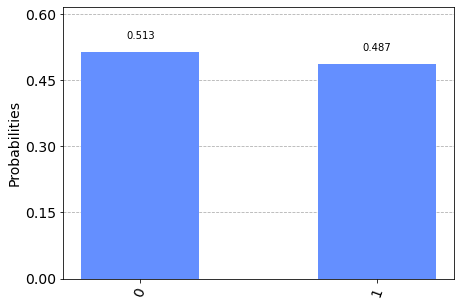

In [36]:
conteos5 = execute(estado_variable_5, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos5)

- Fidelidad = 0.2

In [37]:
estado_variable_4 = np.array([[1-7.5j],[2+3j]])
norma_4 = np.linalg.norm(estado_variable_4)
ev_norm_4 = 1/norma_4 *estado_variable_4

In [38]:
fidelidad(v_mas,ev_norm_4)

0.20818505338078286

In [39]:
estado4_q0 = [v_mas[0][0],v_mas[1][0]]
estado4_q1 = [ev_norm_4[0][0],ev_norm_4[1][0]]

estado_variable_4 = QuantumCircuit(3,1)
estado_variable_4.initialize(estado4_q0,0)
estado_variable_4.initialize(estado4_q1,1)
estado_variable_4.barrier()
estado_variable_4.h(2)
estado_variable_4.cswap(2,1,0)
estado_variable_4.h(2)
estado_variable_4.measure(2,0)

estado_variable_4.draw('text')

┌─────────────────────────────┐           ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├───────────░───────X─────────
     ┌────────┴─────────────────────────────┴─────────┐ ░       │         
q_1: ┤ initialize(0.11931+-0.89482j,0.23862+0.35793j) ├─░───────X─────────
     └────────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ───────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                        ░ └───┘   └───┘└╥┘
c_0: ═══════════════════════════════════════════════════════════════════╩═

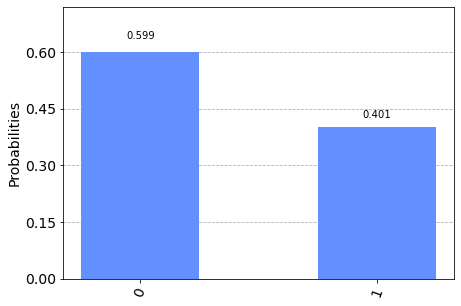

In [40]:
conteos4 = execute(estado_variable_4, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos4)

- Fidelidad = 0.3

In [41]:
estado_variable_6= np.array([[1-7.5j],[5+3j]])
norma_6 = np.linalg.norm(estado_variable_6)
ev_norm_6 = 1/norma_6 *estado_variable_6

In [42]:
fidelidad(v_mas,ev_norm_6)

0.3082191780821917

In [43]:
estado6_q0 = [v_mas[0][0],v_mas[1][0]]
estado6_q1 = [ev_norm_6[0][0],ev_norm_6[1][0]]

estado_variable_6 = QuantumCircuit(3,1)
estado_variable_6.initialize(estado6_q0,0)
estado_variable_6.initialize(estado6_q1,1)
estado_variable_6.barrier()
estado_variable_6.h(2)
estado_variable_6.cswap(2,1,0)
estado_variable_6.h(2)
estado_variable_6.measure(2,0)

estado_variable_6.draw('text')

┌─────────────────────────────┐           ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├───────────░───────X─────────
     ┌────────┴─────────────────────────────┴─────────┐ ░       │         
q_1: ┤ initialize(0.10468+-0.78514j,0.52342+0.31405j) ├─░───────X─────────
     └────────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ───────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                        ░ └───┘   └───┘└╥┘
c_0: ═══════════════════════════════════════════════════════════════════╩═

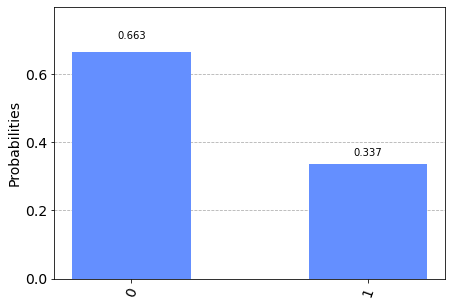

In [44]:
conteos6 = execute(estado_variable_6, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos6)

- Fidelidad : 0.4

In [45]:
estado_variable_1 = np.array([[3-2.5j],[0.5+1.28j]])
norma_1 = np.linalg.norm(estado_variable_1)
ev_norm_1 = 1/norma_1 *estado_variable_1 

In [46]:
ev_norm_1

array([[0.72466305-0.60388587j],
       [0.12077717+0.30918957j]])

In [47]:
fidelidad(v_mas,ev_norm_1)

0.40080754329458984

In [48]:
estado1_q0 = [v_mas[0][0],v_mas[1][0]]
estado1_q1 = [ev_norm_1[0][0],ev_norm_1[1][0]]

estado_variable_1 = QuantumCircuit(3,1)
estado_variable_1.initialize(estado1_q0,0)
estado_variable_1.initialize(estado1_q1,1)
estado_variable_1.barrier()
estado_variable_1.h(2)
estado_variable_1.cswap(2,1,0)
estado_variable_1.h(2)
estado_variable_1.measure(2,0)

estado_variable_1.draw('text')

┌─────────────────────────────┐           ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├───────────░───────X─────────
     ┌────────┴─────────────────────────────┴─────────┐ ░       │         
q_1: ┤ initialize(0.72466+-0.60389j,0.12078+0.30919j) ├─░───────X─────────
     └────────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ───────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                        ░ └───┘   └───┘└╥┘
c_0: ═══════════════════════════════════════════════════════════════════╩═

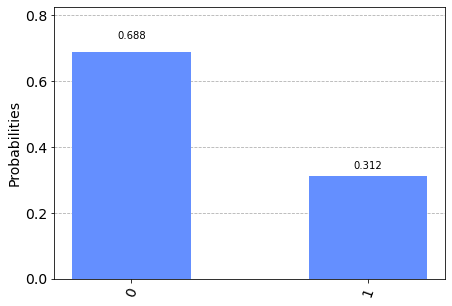

In [49]:
conteos1 = execute(estado_variable_1, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos1)

- Fidelidad = 0.5

In [50]:
estado_variable_2 = np.array([[3-2j],[1+1.50j]])
norma_2 = np.linalg.norm(estado_variable_2)
ev_norm_2 = 1/norma_2 *estado_variable_2

In [51]:
fidelidad(v_mas,ev_norm_2)

0.5000000000000001

In [52]:
estado2_q0 = [v_mas[0][0],v_mas[1][0]]
estado2_q1 = [ev_norm_2[0][0],ev_norm_2[1][0]]

estado_variable_2 = QuantumCircuit(3,1)
estado_variable_2.initialize(estado2_q0,0)
estado_variable_2.initialize(estado2_q1,1)
estado_variable_2.barrier()
estado_variable_2.h(2)
estado_variable_2.cswap(2,1,0)
estado_variable_2.h(2)
estado_variable_2.measure(2,0)


estado_variable_2.draw('text')

┌─────────────────────────────┐          ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├──────────░───────X─────────
     ┌────────┴─────────────────────────────┴────────┐ ░       │         
q_1: ┤ initialize(0.74421+-0.49614j,0.24807+0.3721j) ├─░───────X─────────
     └───────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ──────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                       ░ └───┘   └───┘└╥┘
c_0: ══════════════════════════════════════════════════════════════════╩═

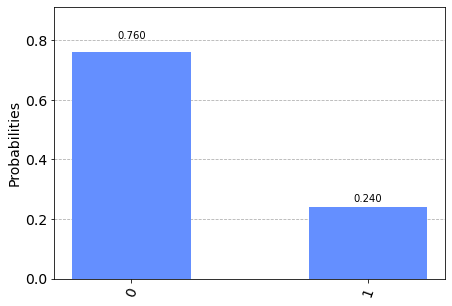

In [53]:
conteos2 = execute(estado_variable_2, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos2)

- Fidelidad = 0.6

In [54]:
estado_variable_7= np.array([[3-7j],[6+1.2j]])
norma_7 = np.linalg.norm(estado_variable_7)
ev_norm_7 = 1/norma_7 *estado_variable_7

In [55]:
fidelidad(v_mas,ev_norm_7)

0.6005867560771163

In [56]:
estado7_q0 = [v_mas[0][0],v_mas[1][0]]
estado7_q1 = [ev_norm_7[0][0],ev_norm_7[1][0]]

estado_variable_7 = QuantumCircuit(3,1)
estado_variable_7.initialize(estado7_q0,0)
estado_variable_7.initialize(estado7_q1,1)
estado_variable_7.barrier()
estado_variable_7.h(2)
estado_variable_7.cswap(2,1,0)
estado_variable_7.h(2)
estado_variable_7.measure(2,0)

estado_variable_7.draw('text')

┌─────────────────────────────┐           ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├───────────░───────X─────────
     ┌────────┴─────────────────────────────┴─────────┐ ░       │         
q_1: ┤ initialize(0.30708+-0.71653j,0.61417+0.12283j) ├─░───────X─────────
     └────────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ───────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                        ░ └───┘   └───┘└╥┘
c_0: ═══════════════════════════════════════════════════════════════════╩═

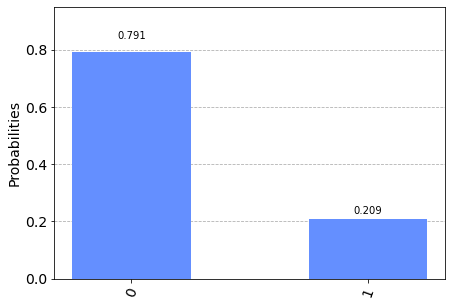

In [57]:
conteos7 = execute(estado_variable_7, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos7)

- Fidelidad = 0.7

In [58]:
estado_variable_8= np.array([[8-8.5j],[6+1.5j]])
norma_8 = np.linalg.norm(estado_variable_8)
ev_norm_8 = 1/norma_8 *estado_variable_8

In [59]:
fidelidad(v_mas,ev_norm_8)

0.7020057306590256

In [60]:
estado8_q0 = [v_mas[0][0],v_mas[1][0]]
estado8_q1 = [ev_norm_8[0][0],ev_norm_8[1][0]]

estado_variable_8 = QuantumCircuit(3,1)
estado_variable_8.initialize(estado8_q0,0)
estado_variable_8.initialize(estado8_q1,1)
estado_variable_8.barrier()
estado_variable_8.h(2)
estado_variable_8.cswap(2,1,0)
estado_variable_8.h(2)
estado_variable_8.measure(2,0)

estado_variable_8.draw('text')

┌─────────────────────────────┐           ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├───────────░───────X─────────
     ┌────────┴─────────────────────────────┴─────────┐ ░       │         
q_1: ┤ initialize(0.60561+-0.64346j,0.45421+0.11355j) ├─░───────X─────────
     └────────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ───────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                        ░ └───┘   └───┘└╥┘
c_0: ═══════════════════════════════════════════════════════════════════╩═

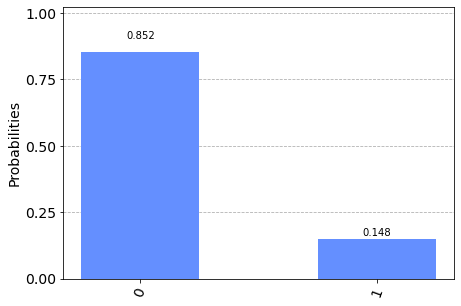

In [61]:
conteos8 = execute(estado_variable_8, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos8)

- Fidelidad = 0.8

In [62]:
estado_variable_3 = np.array([[3-2j],[4+1j]])
norma_3 = np.linalg.norm(estado_variable_3)
ev_norm_3 = 1/norma_3 *estado_variable_3

In [63]:
fidelidad(v_mas,ev_norm_3)

0.8333333333333333

In [64]:
estado3_q0 = [v_mas[0][0],v_mas[1][0]]
estado3_q1 = [ev_norm_3[0][0],ev_norm_3[1][0]]

estado_variable_3 = QuantumCircuit(3,1)
estado_variable_3.initialize(estado3_q0,0)
estado_variable_3.initialize(estado3_q1,1)
estado_variable_3.barrier()
estado_variable_3.h(2)
estado_variable_3.cswap(2,1,0)
estado_variable_3.h(2)
estado_variable_3.measure(2,0)

estado_variable_3.draw('text')

┌─────────────────────────────┐          ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├──────────░───────X─────────
     ┌────────┴─────────────────────────────┴────────┐ ░       │         
q_1: ┤ initialize(0.54772+-0.36515j,0.7303+0.18257j) ├─░───────X─────────
     └───────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ──────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                       ░ └───┘   └───┘└╥┘
c_0: ══════════════════════════════════════════════════════════════════╩═

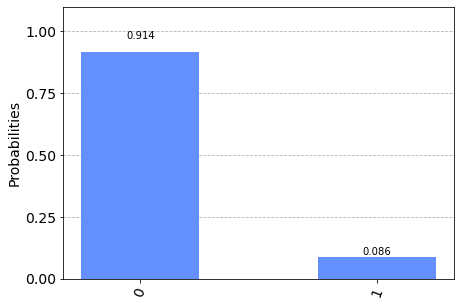

In [65]:
conteos3 = execute(estado_variable_3, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos3)

- Fidelidad = 0.9

In [66]:
estado_variable_9 = np.array([[3-1j],[4+1j]])
norma_9 = np.linalg.norm(estado_variable_9)
ev_norm_9 = 1/norma_9 *estado_variable_9

In [67]:
fidelidad(v_mas,ev_norm_9)

0.9074074074074072

In [68]:
estado9_q0 = [v_mas[0][0],v_mas[1][0]]
estado9_q1= [ev_norm_9[0][0],ev_norm_9[1][0]]

estado_variable_9 = QuantumCircuit(3,1)
estado_variable_9.initialize(estado9_q0,0)
estado_variable_9.initialize(estado9_q1,1)
estado_variable_9.barrier()
estado_variable_9.h(2)
estado_variable_9.cswap(2,1,0)
estado_variable_9.h(2)
estado_variable_9.measure(2,0)

estado_variable_9.draw('text')

┌─────────────────────────────┐          ░                 
q_0: ─────────┤ initialize(0.70711,0.70711) ├──────────░───────X─────────
     ┌────────┴─────────────────────────────┴────────┐ ░       │         
q_1: ┤ initialize(0.57735+-0.19245j,0.7698+0.19245j) ├─░───────X─────────
     └───────────────────────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ──────────────────────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                                       ░ └───┘   └───┘└╥┘
c_0: ══════════════════════════════════════════════════════════════════╩═

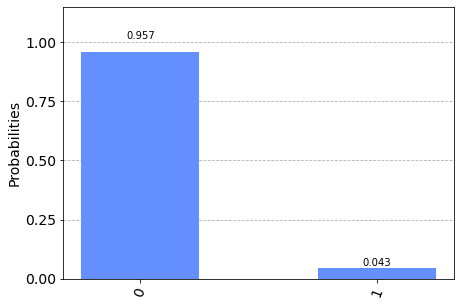

In [69]:
conteos9 = execute(estado_variable_9, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos9)

- Fidelidad = 1

In [70]:
fidelidad(v_mas,v_mas)

0.9999999999999996

In [71]:
estado10_q0 = [v_mas[0][0],v_mas[1][0]]
estado10_q1= [v_mas[0][0],v_mas[1][0]]

estado_variable_10 = QuantumCircuit(3,1)
estado_variable_10.initialize(estado10_q0,0)
estado_variable_10.initialize(estado10_q1,1)
estado_variable_10.barrier()
estado_variable_10.h(2)
estado_variable_10.cswap(2,1,0)
estado_variable_10.h(2)
estado_variable_10.measure(2,0)

estado_variable_10.draw('text')

┌─────────────────────────────┐ ░                 
q_0: ┤ initialize(0.70711,0.70711) ├─░───────X─────────
     ├─────────────────────────────┤ ░       │         
q_1: ┤ initialize(0.70711,0.70711) ├─░───────X─────────
     └─────────────────────────────┘ ░ ┌───┐ │ ┌───┐┌─┐
q_2: ────────────────────────────────░─┤ H ├─■─┤ H ├┤M├
                                     ░ └───┘   └───┘└╥┘
c_0: ════════════════════════════════════════════════╩═

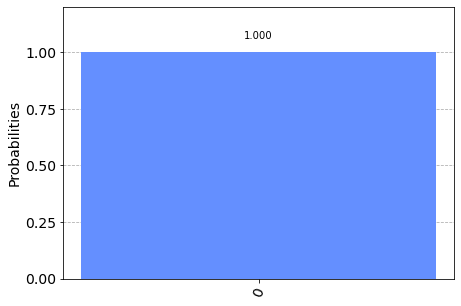

In [72]:
conteos10 = execute(estado_variable_10, backend = simulador,shots=1000).result().get_counts()
plot_histogram(conteos10)

- Gráfica de fidelidad vs el resultado del estado cero $|0\rangle$

![./CNYT/GRÁFICA.PNG](./CNYT/GRÁFICA.PNG)

**Conlusión:**
- La fidelidad y el resultado del estado cero en cada caso son directamente proporcionales, cada vez que aumenta la fidelidad, el numero de resultado del estado cero, aumenta. 

- Cuando la fidelidad es aproximadamente 1, los mil resultados fueron al estado cero, **lo cuál es lo esperado.** 

---

PARCIAL FINAL


In [78]:
vectorFinal = np.array([[0-1j],[1j+0]])

hadamard =  np.array([
    [1/np.sqrt(2),1/np.sqrt(2)],[1/np.sqrt(2),-1/np.sqrt(2)]])
                            
                              
print(hadamard)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]


In [79]:
op1 = np.kron(hadamard,vectorFinal)

In [80]:
ans = np.kron(op1,hadamard)

In [81]:
print(ans)

[[ 0.-0.5j  0.-0.5j  0.-0.5j  0.-0.5j]
 [ 0.-0.5j  0.+0.5j  0.-0.5j  0.+0.5j]
 [ 0.+0.5j  0.+0.5j  0.+0.5j  0.+0.5j]
 [ 0.+0.5j -0.-0.5j  0.+0.5j -0.-0.5j]
 [ 0.-0.5j  0.-0.5j  0.+0.5j  0.+0.5j]
 [ 0.-0.5j  0.+0.5j  0.+0.5j -0.-0.5j]
 [ 0.+0.5j  0.+0.5j  0.-0.5j  0.-0.5j]
 [ 0.+0.5j -0.-0.5j  0.-0.5j  0.+0.5j]]


In [82]:
print(op1)

[[ 0.-0.70710678j  0.-0.70710678j]
 [ 0.+0.70710678j  0.+0.70710678j]
 [ 0.-0.70710678j  0.+0.70710678j]
 [ 0.+0.70710678j -0.-0.70710678j]]
